# Individual Algo Strong Scaling (input types on same plots) - Strong Scaling

In [1]:
import sys
sys.path.append("/scratch/group/csce435-f23/python-3.8.17/lib/python3.8/site-packages")
sys.path.append("/scratch/group/csce435-f23/thicket")
from glob import glob

import matplotlib.pyplot as plt
import pandas as pd

import thicket as th

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

Read in all the files

In [2]:
tk = th.Thicket.from_caliperreader(glob("results_cuda/*.cali"))
tk.dataframe = tk.dataframe.drop(["nid", "spot.channel", "Total time"], axis=1)
#tk.dataframe = tk.dataframe.drop(["spot.channel", "Total time"], axis=1)

In [3]:
# Performance data
tk.dataframe

Min time/rank  \
node                                              profile                     
{'name': 'main', 'type': 'function'}              4584309          0.767206   
                                                  30257873        37.308700   
                                                  100785916        1.144368   
                                                  103321241       32.602903   
                                                  122293819        1.155427   
                                                  147300719        1.081500   
                                                  175163926       38.289706   
                                                  210329029        1.280531   
                                                  288526081       66.606727   
                                                  310715738        0.818243   
                                                  340652102        0.898045   
                                                  356196107        0.760015   
                                                  361977208        0.735487   
                                                  367451772       32.509567   
                                                  368276427       31.222760   
                                                  380005047        1.116397   
                                                  500181594        0.786379   
                                                  505032640        1.167458   
                                                  507678526        1.013454   
                                                  522130347        1.199671   
                                                  531736649        1.158003   
                                                  599409617       31.209127   
                                                  656701914        0.751892   
                                                  683612914       33.370848   
                                                  684059473        0.840638   
                                                  707347936       30.809654   
                                                  718586037       33.211975   
                                                  750108001       32.614075   
                                                  777391490        0.860239   
                                                  799494333        1.160746   
                                                  836007025       32.960439   
                                                  857079455       32.763825   
                                                  912545129        0.852789   
                                                  966319862        0.741152   
                                                  1030858973      32.706397   
                                                  1065836203      31.412882   
                                                  1101338790      37.184711   
                                                  1191741555       0.817931   
                                                  1226494168       0.959492   
                                                  1226814142      32.751493   
                                                  1278724679       1.054854   
                                                  1283658011      31.540706   
                                                  1301583914       0.801358   
                                                  1310880387      31.257197   
                                                  1367167524       0.818102   
                                                  1368884237      32.725061   
                                                  1405918690      37.299951   
                                                  1484145929      38.279861   
                                                  1550580995       1.063281   
                                 

Groupby matrix size argument, available in the metadata (tk.metadata) to organize our performance data into 3 groupings.

In [4]:
tk.statsframe.dataframe["time"]= 1
print(tk.tree())

  _____ _     _      _        _   
 |_   _| |__ (_) ___| | _____| |_ 
   | | | '_ \| |/ __| |/ / _ \ __|
   | | | | | | | (__|   <  __/ |_ 
   |_| |_| |_|_|\___|_|\_\___|\__|  v2023.3.0

1.000 main
├─ 1.000 comm
│  └─ 1.000 comm_large
│     └─ 1.000 cudaMemcpy
├─ 1.000 comp
│  ├─ 1.000 comp_large
│  └─ 1.000 comp_small
├─ 1.000 correctness_check
└─ 1.000 data_init

Legend (Metric: time Min: 1.00 Max: 1.00)
█ 1.00 - 1.00
█ 1.00 - 1.00
█ 1.00 - 1.00
█ 1.00 - 1.00
█ 1.00 - 1.00
█ 1.00 - 1.00

name User code    ◀  Only in left graph    ▶  Only in right graph



In [5]:
tk.metadata

,cali.caliper.version,spot.metrics,spot.timeseries.metrics,spot.format.version,spot.options,spot.channels,cali.channel,spot:cuda.gputime,spot:node.order,spot:output,launchdate,libraries,cmdline,cluster,Algorithm,ProgrammingModel,Datatype,SizeOfDatatype,InputSize,InputType,num_procs,num_threads,num_blocks,group_num,implementation_source,correctness_check
profile,,,,,,,,,,,,,,,,,,,,,,,,,,
4584309,2.11.0-dev,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"cuda.gputime,node.order",regionprofile,spot,true,true,t256-v1048576-s3.cali,1701562149,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./sample, 256, 1048576, 3]",g,SampleSort,CUDA,float,4,1048576,random,0,256,4096,14,Handwritten,success
30257873,2.11.0-dev,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"cuda.gputime,node.order",regionprofile,spot,true,true,t256-v268435456-s3.cali,1701562399,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./sample, 256, 268435456, 3]",g,SampleSort,CUDA,float,4,268435456,random,0,256,1048576,14,Handwritten,success
100785916,2.11.0-dev,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"cuda.gputime,node.order",regionprofile,spot,true,true,t128-v1048576-s3.cali,1701562150,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./sample, 128, 1048576, 3]",g,SampleSort,CUDA,float,4,1048576,random,0,128,8192,14,Handwritten,success
103321241,2.11.0-dev,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"cuda.gputime,node.order",regionprofile,spot,true,true,t128-v268435456-s0.cali,1701562309,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./sample, 128, 268435456, 0]",g,SampleSort,CUDA,float,4,268435456,sorted,0,128,2097152,14,Handwritten,success
122293819,2.11.0-dev,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"cuda.gputime,node.order",regionprofile,spot,true,true,t1024-v16777216-s0.cali,1701562306,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./sample, 1024, 16777216, 0]",g,SampleSort,CUDA,float,4,16777216,sorted,0,1024,16384,14,Handwritten,success
147300719,2.11.0-dev,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"cuda.gputime,node.order",regionprofile,spot,true,true,t64-v1048576-s2.cali,1701562109,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./sample, 64, 1048576, 2]",g,SampleSort,CUDA,float,4,1048576,1 perturbed,0,64,16384,14,Handwritten,success
175163926,2.11.0-dev,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"cuda.gputime,node.order",regionprofile,spot,true,true,t256-v268435456-s2.cali,1701562367,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./sample, 256, 268435456, 2]",g,SampleSort,CUDA,float,4,268435456,1 perturbed,0,256,1048576,14,Handwritten,success
210329029,2.11.0-dev,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"cuda.gputime,node.order",regionprofile,spot,true,true,t256-v65536-s0.cali,1701564205,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./sample, 256, 65536, 0]",g,SampleSort,CUDA,float,4,65536,sorted,0,256,256,14,Handwritten,success
288526081,2.11.0-dev,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"cuda.gputime,node.order",regionprofile,spot,true,true,t1024-v268435456-s3.cali,1701562397,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./sample, 1024, 268435456, 3]",g,SampleSort,CUDA,float,4,268435456,random,0,1024,262144,14,Handwritten,success


In [6]:
gb = tk.groupby("num_threads")
print(gb.keys())
allthickets = list(gb.values())
input64 = gb[64].groupby("InputType")
input128 = gb[128].groupby("InputType")
input256 = gb[256].groupby("InputType")
input512 = gb[512].groupby("InputType")
input1024 = gb[1024].groupby("InputType")


#num threads for cuda: (64, 128, 256, 512, 1024)

# inputsorted = gb['sorted'].groupby("InputType")
# inputreversed = gb['reversed'].groupby("InputSize")
# inputperturbed = gb['1 perturbed'].groupby("InputSize")
# inputrandom = gb['random'].groupby("InputSize")

5  thickets created...
{64: <thicket.thicket.Thicket object at 0x2ae39311c5e0>, 128: <thicket.thicket.Thicket object at 0x2ae3930f8e80>, 256: <thicket.thicket.Thicket object at 0x2ae393044670>, 512: <thicket.thicket.Thicket object at 0x2ae3930634f0>, 1024: <thicket.thicket.Thicket object at 0x2ae3930748e0>}
dict_keys([64, 128, 256, 512, 1024])
4  thickets created...
{'1 perturbed': <thicket.thicket.Thicket object at 0x2ae3930bed60>, 'random': <thicket.thicket.Thicket object at 0x2ae39310e0a0>, 'reversed': <thicket.thicket.Thicket object at 0x2ae3930684f0>, 'sorted': <thicket.thicket.Thicket object at 0x2ae3931253a0>}
4  thickets created...
{'1 perturbed': <thicket.thicket.Thicket object at 0x2ae39302c070>, 'random': <thicket.thicket.Thicket object at 0x2ae39317f940>, 'reversed': <thicket.thicket.Thicket object at 0x2ae39319c820>, 'sorted': <thicket.thicket.Thicket object at 0x2ae392f62e20>}
4  thickets created...
{'1 perturbed': <thicket.thicket.Thicket object at 0x2ae3931b0c40>, 'rand

Compose these 3 groups column-wise to get a holistic view of the data

In [7]:

ctk64 = th.Thicket.concat_thickets(
    thickets=list(input64.values()),
    headers=list(input64.keys()),
    axis="columns",
    metadata_key="InputSize"
)

ctk128 = th.Thicket.concat_thickets(
    thickets=list(input128.values()),
    headers=list(input128.keys()),
    axis="columns",
    metadata_key="InputSize"
)

ctk256 = th.Thicket.concat_thickets(
    thickets=list(input256.values()),
    headers=list(input256.keys()),
    axis="columns",
    metadata_key="InputSize"
)

ctk512 = th.Thicket.concat_thickets(
    thickets=list(input512.values()),
    headers=list(input512.keys()),
    axis="columns",
    metadata_key="InputSize"
)
ctk1024 = th.Thicket.concat_thickets(
    thickets=list(input1024.values()),
    headers=list(input1024.keys()),
    axis="columns",
    metadata_key="InputSize"
)



allctk = []
allctk.append(ctk64)
allctk.append(ctk128)
allctk.append(ctk256)
allctk.append(ctk512)
allctk.append(ctk1024)

In [8]:
for ctk in allctk:
    display(ctk.dataframe)

1 perturbed  \
                                                            Min time/rank   
node                                              InputSize                 
{'name': 'main', 'type': 'function'}              65536          1.248635   
                                                  262144         0.751892   
                                                  1048576        1.081500   
                                                  4194304        1.259044   
                                                  16777216      31.209127   
                                                  67108864      32.659697   
                                                  268435456     37.909286   
{'name': 'comm', 'type': 'function'}              65536          0.621906   
                                                  262144         0.408590   
                                                  1048576        0.443064   
                                                  4194304        0.781560   
                                                  16777216      30.432256   
                                                  67108864      30.553003   
                                                  268435456     30.668884   
{'name': 'comm_large', 'type': 'function'}        65536          0.621751   
                                                  262144         0.408437   
                                                  1048576        0.442919   
                                                  4194304        0.781398   
                                                  16777216      30.432111   
                                                  67108864      30.552858   
                                                  268435456     30.668725   
{'name': 'cudaMemcpy', 'type': 'function'}        65536          0.621592   
                                                  262144         0.408262   
                                                  1048576        0.442775   
                                                  4194304        0.781241   
                                                  16777216      30.431932   
                                                  67108864      30.552702   
                                                  268435456     30.668567   
{'name': 'comp', 'type': 'function'}              65536          0.000695   
                                                  262144         0.000629   
                                                  1048576        0.000622   
                                                  4194304        0.000650   
                                                  16777216       0.000598   
                                                  67108864       0.000693   
                                                  268435456      0.000689   
{'name': 'comp_large', 'type': 'function'}        65536          0.000041   
                                                  262144         0.000042   
                                                  1048576        0.000042   
                                                  4194304        0.000043   
                                                  16777216       0.000043   
                                                  67108864       0.000046   
                                                  268435456      0.000048   
{'name': 'comp_small', 'type': 'function'}        65536          0.000532   
                                                  262144         0.000468   
                                                  1048576        0.000463   
                                                  4194304        0.000484   
                                                  16777216       0.000441   
                                                  67108864       0.000510   
                                                  268435456      0.000483   
{'name': 'correctness_check', 'type': 'function'} 65536   

1 perturbed  \
                                                            Min time/rank   
node                                              InputSize                 
{'name': 'main', 'type': 'function'}              65536          1.242247   
                                                  262144         0.760015   
                                                  1048576        0.840638   
                                                  4194304        0.813784   
                                                  16777216      31.108555   
                                                  67108864      32.642569   
                                                  268435456     37.998450   
{'name': 'comm', 'type': 'function'}              65536          0.611629   
                                                  262144         0.430614   
                                                  1048576        0.473301   
                                                  4194304        0.374265   
                                                  16777216      30.346310   
                                                  67108864      30.583062   
                                                  268435456     30.724130   
{'name': 'comm_large', 'type': 'function'}        65536          0.611482   
                                                  262144         0.430463   
                                                  1048576        0.473151   
                                                  4194304        0.374114   
                                                  16777216      30.346141   
                                                  67108864      30.582908   
                                                  268435456     30.723962   
{'name': 'cudaMemcpy', 'type': 'function'}        65536          0.611341   
                                                  262144         0.430315   
                                                  1048576        0.473004   
                                                  4194304        0.373969   
                                                  16777216      30.345973   
                                                  67108864      30.582734   
                                                  268435456     30.723767   
{'name': 'comp', 'type': 'function'}              65536          0.002070   
                                                  262144         0.002091   
                                                  1048576        0.002098   
                                                  4194304        0.002060   
                                                  16777216       0.002044   
                                                  67108864       0.002159   
                                                  268435456      0.002075   
{'name': 'comp_large', 'type': 'function'}        65536          0.000041   
                                                  262144         0.000041   
                                                  1048576        0.000041   
                                                  4194304        0.000042   
                                                  16777216       0.000046   
                                                  67108864       0.000064   
                                                  268435456      0.000041   
{'name': 'comp_small', 'type': 'function'}        65536          0.001908   
                                                  262144         0.001928   
                                                  1048576        0.001937   
                                                  4194304        0.001899   
                                                  16777216       0.001874   
                                                  67108864       0.001971   
                                                  268435456      0.001909   
{'name': 'correctness_check', 'type': 'function'} 65536   

1 perturbed  \
                                                            Min time/rank   
node                                              InputSize                 
{'name': 'main', 'type': 'function'}              65536          0.732062   
                                                  262144         1.199671   
                                                  1048576        0.741152   
                                                  4194304        1.160942   
                                                  16777216       1.262646   
                                                  67108864      32.509567   
                                                  268435456     38.289706   
{'name': 'comm', 'type': 'function'}              65536          0.386126   
                                                  262144         0.822007   
                                                  1048576        0.391089   
                                                  4194304        0.445315   
                                                  16777216       0.493107   
                                                  67108864      30.446473   
                                                  268435456     31.037570   
{'name': 'comm_large', 'type': 'function'}        65536          0.386027   
                                                  262144         0.821901   
                                                  1048576        0.390987   
                                                  4194304        0.445219   
                                                  16777216       0.493008   
                                                  67108864      30.446361   
                                                  268435456     31.037462   
{'name': 'cudaMemcpy', 'type': 'function'}        65536          0.385936   
                                                  262144         0.821796   
                                                  1048576        0.390887   
                                                  4194304        0.445125   
                                                  16777216       0.492910   
                                                  67108864      30.446229   
                                                  268435456     31.037350   
{'name': 'comp', 'type': 'function'}              65536          0.005838   
                                                  262144         0.006687   
                                                  1048576        0.003746   
                                                  4194304        0.005107   
                                                  16777216       0.005077   
                                                  67108864       0.004095   
                                                  268435456      0.005170   
{'name': 'comp_large', 'type': 'function'}        65536          0.000021   
                                                  262144         0.000024   
                                                  1048576        0.000022   
                                                  4194304        0.000019   
                                                  16777216       0.000018   
                                                  67108864       0.000032   
                                                  268435456      0.000025   
{'name': 'comp_small', 'type': 'function'}        65536          0.005748   
                                                  262144         0.006582   
                                                  1048576        0.003651   
                                                  4194304        0.005018   
                                                  16777216       0.004988   
                                                  67108864       0.003989   
                                                  268435456      0.005049   
{'name': 'correctness_check', 'type': 'function'} 65536   

1 perturbed  \
                                                            Min time/rank   
node                                              InputSize                 
{'name': 'main', 'type': 'function'}              65536          0.959893   
                                                  262144         0.660852   
                                                  1048576        0.760433   
                                                  4194304        1.051725   
                                                  16777216       1.167458   
                                                  67108864      32.614075   
                                                  268435456     38.279861   
{'name': 'comm', 'type': 'function'}              65536          0.573895   
                                                  262144         0.321009   
                                                  1048576        0.398806   
                                                  4194304        0.320033   
                                                  16777216       0.387878   
                                                  67108864      30.536235   
                                                  268435456     31.019917   
{'name': 'comm_large', 'type': 'function'}        65536          0.573796   
                                                  262144         0.320917   
                                                  1048576        0.398706   
                                                  4194304        0.319927   
                                                  16777216       0.387766   
                                                  67108864      30.536135   
                                                  268435456     31.019813   
{'name': 'cudaMemcpy', 'type': 'function'}        65536          0.573709   
                                                  262144         0.320842   
                                                  1048576        0.398608   
                                                  4194304        0.319845   
                                                  16777216       0.387662   
                                                  67108864      30.536016   
                                                  268435456     31.019712   
{'name': 'comp', 'type': 'function'}              65536          0.017670   
                                                  262144         0.012942   
                                                  1048576        0.014847   
                                                  4194304        0.012977   
                                                  16777216       0.018951   
                                                  67108864       0.013727   
                                                  268435456      0.013763   
{'name': 'comp_large', 'type': 'function'}        65536          0.000018   
                                                  262144         0.000019   
                                                  1048576        0.000020   
                                                  4194304        0.000018   
                                                  16777216       0.000020   
                                                  67108864       0.000030   
                                                  268435456      0.000022   
{'name': 'comp_small', 'type': 'function'}        65536          0.017584   
                                                  262144         0.012859   
                                                  1048576        0.014755   
                                                  4194304        0.012894   
                                                  16777216       0.018848   
                                                  67108864       0.013622   
                                                  268435456      0.013652   
{'name': 'correctness_check', 'type': 'function'} 65536   

1 perturbed  \
                                                            Min time/rank   
node                                              InputSize                 
{'name': 'main', 'type': 'function'}              65536          0.735487   
                                                  262144         1.188964   
                                                  1048576        0.781413   
                                                  4194304        0.898045   
                                                  16777216       1.319428   
                                                  67108864      32.666906   
                                                  268435456     38.327869   
{'name': 'comm', 'type': 'function'}              65536          0.353302   
                                                  262144         0.516431   
                                                  1048576        0.375182   
                                                  4194304        0.388630   
                                                  16777216       0.499756   
                                                  67108864      30.551386   
                                                  268435456     30.975389   
{'name': 'comm_large', 'type': 'function'}        65536          0.353199   
                                                  262144         0.516317   
                                                  1048576        0.375072   
                                                  4194304        0.388524   
                                                  16777216       0.499658   
                                                  67108864      30.551281   
                                                  268435456     30.975278   
{'name': 'cudaMemcpy', 'type': 'function'}        65536          0.353105   
                                                  262144         0.516221   
                                                  1048576        0.374969   
                                                  4194304        0.388421   
                                                  16777216       0.499565   
                                                  67108864      30.551149   
                                                  268435456     30.975167   
{'name': 'comp', 'type': 'function'}              65536          0.056961   
                                                  262144         0.055767   
                                                  1048576        0.054262   
                                                  4194304        0.058404   
                                                  16777216       0.058544   
                                                  67108864       0.056753   
                                                  268435456      0.056803   
{'name': 'comp_large', 'type': 'function'}        65536          0.000021   
                                                  262144         0.000018   
                                                  1048576        0.000020   
                                                  4194304        0.000025   
                                                  16777216       0.000019   
                                                  67108864       0.000036   
                                                  268435456      0.000021   
{'name': 'comp_small', 'type': 'function'}        65536          0.056862   
                                                  262144         0.055646   
                                                  1048576        0.054157   
                                                  4194304        0.058279   
                                                  16777216       0.058451   
                                                  67108864       0.056632   
                                                  268435456      0.056690   
{'name': 'correctness_check', 'type': 'function'} 65536   

Perform pandas operations to get the table in a desirable format for plotting

In [9]:
for ctk in allctk:
    # Drop unwanted columns
    columns_to_drop = [("node", ""), ("index", ""),]
    ctk.dataframe = ctk.dataframe.reset_index().drop(columns_to_drop, axis=1, errors='ignore')
    # Rename index to remove tuple
    ctk.dataframe = ctk.dataframe.rename({("name", ""): "name", ("InputSize", ""): "InputSize"}).set_index(["name", "InputSize"])

In [10]:
for ctk in allctk:
    display(ctk.dataframe)

1 perturbed                              \
                            Min time/rank Max time/rank Avg time/rank   
name              InputSize                                             
main              65536          1.248635      1.248635      1.248635   
                  262144         0.751892      0.751892      0.751892   
                  1048576        1.081500      1.081500      1.081500   
                  4194304        1.259044      1.259044      1.259044   
                  16777216      31.209127     31.209127     31.209127   
                  67108864      32.659697     32.659697     32.659697   
                  268435456     37.909286     37.909286     37.909286   
comm              65536          0.621906      0.621906      0.621906   
                  262144         0.408590      0.408590      0.408590   
                  1048576        0.443064      0.443064      0.443064   
                  4194304        0.781560      0.781560      0.781560   
                  16777216      30.432256     30.432256     30.432256   
                  67108864      30.553003     30.553003     30.553003   
                  268435456     30.668884     30.668884     30.668884   
comm_large        65536          0.621751      0.621751      0.621751   
                  262144         0.408437      0.408437      0.408437   
                  1048576        0.442919      0.442919      0.442919   
                  4194304        0.781398      0.781398      0.781398   
                  16777216      30.432111     30.432111     30.432111   
                  67108864      30.552858     30.552858     30.552858   
                  268435456     30.668725     30.668725     30.668725   
cudaMemcpy        65536          0.621592      0.621592      0.621592   
                  262144         0.408262      0.408262      0.408262   
                  1048576        0.442775      0.442775      0.442775   
                  4194304        0.781241      0.781241      0.781241   
                  16777216      30.431932     30.431932     30.431932   
                  67108864      30.552702     30.552702     30.552702   
                  268435456     30.668567     30.668567     30.668567   
comp              65536          0.000695      0.000695      0.000695   
                  262144         0.000629      0.000629      0.000629   
                  1048576        0.000622      0.000622      0.000622   
                  4194304        0.000650      0.000650      0.000650   
                  16777216       0.000598      0.000598      0.000598   
                  67108864       0.000693      0.000693      0.000693   
                  268435456      0.000689      0.000689      0.000689   
comp_large        65536          0.000041      0.000041      0.000041   
                  262144         0.000042      0.000042      0.000042   
                  1048576        0.000042      0.000042      0.000042   
                  4194304        0.000043      0.000043      0.000043   
                  16777216       0.000043      0.000043      0.000043   
                  67108864       0.000046      0.000046      0.000046   
                  268435456      0.000048      0.000048      0.000048   
comp_small        65536          0.000532      0.000532      0.000532   
                  262144         0.000468      0.000468      0.000468   
                  1048576        0.000463      0.000463      0.000463   
                  4194304        0.000484      0.000484      0.000484   
                  16777216       0.000441      0.000441      0.000441   
                  67108864       0.000510      0.000510      0.000510   
                  268435456      0.000483      0.000483      0.000483   
correctness_check 65536          0.000555      0.000555      0.000555   
                  262144         0.002123      0.002123      0.002123   
                  1048576        0.005411      0.005411      0.005411   
               

1 perturbed                              \
                            Min time/rank Max time/rank Avg time/rank   
name              InputSize                                             
main              65536          1.242247      1.242247      1.242247   
                  262144         0.760015      0.760015      0.760015   
                  1048576        0.840638      0.840638      0.840638   
                  4194304        0.813784      0.813784      0.813784   
                  16777216      31.108555     31.108555     31.108555   
                  67108864      32.642569     32.642569     32.642569   
                  268435456     37.998450     37.998450     37.998450   
comm              65536          0.611629      0.611629      0.611629   
                  262144         0.430614      0.430614      0.430614   
                  1048576        0.473301      0.473301      0.473301   
                  4194304        0.374265      0.374265      0.374265   
                  16777216      30.346310     30.346310     30.346310   
                  67108864      30.583062     30.583062     30.583062   
                  268435456     30.724130     30.724130     30.724130   
comm_large        65536          0.611482      0.611482      0.611482   
                  262144         0.430463      0.430463      0.430463   
                  1048576        0.473151      0.473151      0.473151   
                  4194304        0.374114      0.374114      0.374114   
                  16777216      30.346141     30.346141     30.346141   
                  67108864      30.582908     30.582908     30.582908   
                  268435456     30.723962     30.723962     30.723962   
cudaMemcpy        65536          0.611341      0.611341      0.611341   
                  262144         0.430315      0.430315      0.430315   
                  1048576        0.473004      0.473004      0.473004   
                  4194304        0.373969      0.373969      0.373969   
                  16777216      30.345973     30.345973     30.345973   
                  67108864      30.582734     30.582734     30.582734   
                  268435456     30.723767     30.723767     30.723767   
comp              65536          0.002070      0.002070      0.002070   
                  262144         0.002091      0.002091      0.002091   
                  1048576        0.002098      0.002098      0.002098   
                  4194304        0.002060      0.002060      0.002060   
                  16777216       0.002044      0.002044      0.002044   
                  67108864       0.002159      0.002159      0.002159   
                  268435456      0.002075      0.002075      0.002075   
comp_large        65536          0.000041      0.000041      0.000041   
                  262144         0.000041      0.000041      0.000041   
                  1048576        0.000041      0.000041      0.000041   
                  4194304        0.000042      0.000042      0.000042   
                  16777216       0.000046      0.000046      0.000046   
                  67108864       0.000064      0.000064      0.000064   
                  268435456      0.000041      0.000041      0.000041   
comp_small        65536          0.001908      0.001908      0.001908   
                  262144         0.001928      0.001928      0.001928   
                  1048576        0.001937      0.001937      0.001937   
                  4194304        0.001899      0.001899      0.001899   
                  16777216       0.001874      0.001874      0.001874   
                  67108864       0.001971      0.001971      0.001971   
                  268435456      0.001909      0.001909      0.001909   
correctness_check 65536          0.000552      0.000552      0.000552   
                  262144         0.001657      0.001657      0.001657   
                  1048576        0.003341      0.003341      0.003341   
               

1 perturbed                              \
                            Min time/rank Max time/rank Avg time/rank   
name              InputSize                                             
main              65536          0.732062      0.732062      0.732062   
                  262144         1.199671      1.199671      1.199671   
                  1048576        0.741152      0.741152      0.741152   
                  4194304        1.160942      1.160942      1.160942   
                  16777216       1.262646      1.262646      1.262646   
                  67108864      32.509567     32.509567     32.509567   
                  268435456     38.289706     38.289706     38.289706   
comm              65536          0.386126      0.386126      0.386126   
                  262144         0.822007      0.822007      0.822007   
                  1048576        0.391089      0.391089      0.391089   
                  4194304        0.445315      0.445315      0.445315   
                  16777216       0.493107      0.493107      0.493107   
                  67108864      30.446473     30.446473     30.446473   
                  268435456     31.037570     31.037570     31.037570   
comm_large        65536          0.386027      0.386027      0.386027   
                  262144         0.821901      0.821901      0.821901   
                  1048576        0.390987      0.390987      0.390987   
                  4194304        0.445219      0.445219      0.445219   
                  16777216       0.493008      0.493008      0.493008   
                  67108864      30.446361     30.446361     30.446361   
                  268435456     31.037462     31.037462     31.037462   
cudaMemcpy        65536          0.385936      0.385936      0.385936   
                  262144         0.821796      0.821796      0.821796   
                  1048576        0.390887      0.390887      0.390887   
                  4194304        0.445125      0.445125      0.445125   
                  16777216       0.492910      0.492910      0.492910   
                  67108864      30.446229     30.446229     30.446229   
                  268435456     31.037350     31.037350     31.037350   
comp              65536          0.005838      0.005838      0.005838   
                  262144         0.006687      0.006687      0.006687   
                  1048576        0.003746      0.003746      0.003746   
                  4194304        0.005107      0.005107      0.005107   
                  16777216       0.005077      0.005077      0.005077   
                  67108864       0.004095      0.004095      0.004095   
                  268435456      0.005170      0.005170      0.005170   
comp_large        65536          0.000021      0.000021      0.000021   
                  262144         0.000024      0.000024      0.000024   
                  1048576        0.000022      0.000022      0.000022   
                  4194304        0.000019      0.000019      0.000019   
                  16777216       0.000018      0.000018      0.000018   
                  67108864       0.000032      0.000032      0.000032   
                  268435456      0.000025      0.000025      0.000025   
comp_small        65536          0.005748      0.005748      0.005748   
                  262144         0.006582      0.006582      0.006582   
                  1048576        0.003651      0.003651      0.003651   
                  4194304        0.005018      0.005018      0.005018   
                  16777216       0.004988      0.004988      0.004988   
                  67108864       0.003989      0.003989      0.003989   
                  268435456      0.005049      0.005049      0.005049   
correctness_check 65536          0.000228      0.000228      0.000228   
                  262144         0.000882      0.000882      0.000882   
                  1048576        0.003141      0.003141      0.003141   
               

1 perturbed                              \
                            Min time/rank Max time/rank Avg time/rank   
name              InputSize                                             
main              65536          0.959893      0.959893      0.959893   
                  262144         0.660852      0.660852      0.660852   
                  1048576        0.760433      0.760433      0.760433   
                  4194304        1.051725      1.051725      1.051725   
                  16777216       1.167458      1.167458      1.167458   
                  67108864      32.614075     32.614075     32.614075   
                  268435456     38.279861     38.279861     38.279861   
comm              65536          0.573895      0.573895      0.573895   
                  262144         0.321009      0.321009      0.321009   
                  1048576        0.398806      0.398806      0.398806   
                  4194304        0.320033      0.320033      0.320033   
                  16777216       0.387878      0.387878      0.387878   
                  67108864      30.536235     30.536235     30.536235   
                  268435456     31.019917     31.019917     31.019917   
comm_large        65536          0.573796      0.573796      0.573796   
                  262144         0.320917      0.320917      0.320917   
                  1048576        0.398706      0.398706      0.398706   
                  4194304        0.319927      0.319927      0.319927   
                  16777216       0.387766      0.387766      0.387766   
                  67108864      30.536135     30.536135     30.536135   
                  268435456     31.019813     31.019813     31.019813   
cudaMemcpy        65536          0.573709      0.573709      0.573709   
                  262144         0.320842      0.320842      0.320842   
                  1048576        0.398608      0.398608      0.398608   
                  4194304        0.319845      0.319845      0.319845   
                  16777216       0.387662      0.387662      0.387662   
                  67108864      30.536016     30.536016     30.536016   
                  268435456     31.019712     31.019712     31.019712   
comp              65536          0.017670      0.017670      0.017670   
                  262144         0.012942      0.012942      0.012942   
                  1048576        0.014847      0.014847      0.014847   
                  4194304        0.012977      0.012977      0.012977   
                  16777216       0.018951      0.018951      0.018951   
                  67108864       0.013727      0.013727      0.013727   
                  268435456      0.013763      0.013763      0.013763   
comp_large        65536          0.000018      0.000018      0.000018   
                  262144         0.000019      0.000019      0.000019   
                  1048576        0.000020      0.000020      0.000020   
                  4194304        0.000018      0.000018      0.000018   
                  16777216       0.000020      0.000020      0.000020   
                  67108864       0.000030      0.000030      0.000030   
                  268435456      0.000022      0.000022      0.000022   
comp_small        65536          0.017584      0.017584      0.017584   
                  262144         0.012859      0.012859      0.012859   
                  1048576        0.014755      0.014755      0.014755   
                  4194304        0.012894      0.012894      0.012894   
                  16777216       0.018848      0.018848      0.018848   
                  67108864       0.013622      0.013622      0.013622   
                  268435456      0.013652      0.013652      0.013652   
correctness_check 65536          0.000237      0.000237      0.000237   
                  262144         0.000881      0.000881      0.000881   
                  1048576        0.002852      0.002852      0.002852   
               

1 perturbed                              \
                            Min time/rank Max time/rank Avg time/rank   
name              InputSize                                             
main              65536          0.735487      0.735487      0.735487   
                  262144         1.188964      1.188964      1.188964   
                  1048576        0.781413      0.781413      0.781413   
                  4194304        0.898045      0.898045      0.898045   
                  16777216       1.319428      1.319428      1.319428   
                  67108864      32.666906     32.666906     32.666906   
                  268435456     38.327869     38.327869     38.327869   
comm              65536          0.353302      0.353302      0.353302   
                  262144         0.516431      0.516431      0.516431   
                  1048576        0.375182      0.375182      0.375182   
                  4194304        0.388630      0.388630      0.388630   
                  16777216       0.499756      0.499756      0.499756   
                  67108864      30.551386     30.551386     30.551386   
                  268435456     30.975389     30.975389     30.975389   
comm_large        65536          0.353199      0.353199      0.353199   
                  262144         0.516317      0.516317      0.516317   
                  1048576        0.375072      0.375072      0.375072   
                  4194304        0.388524      0.388524      0.388524   
                  16777216       0.499658      0.499658      0.499658   
                  67108864      30.551281     30.551281     30.551281   
                  268435456     30.975278     30.975278     30.975278   
cudaMemcpy        65536          0.353105      0.353105      0.353105   
                  262144         0.516221      0.516221      0.516221   
                  1048576        0.374969      0.374969      0.374969   
                  4194304        0.388421      0.388421      0.388421   
                  16777216       0.499565      0.499565      0.499565   
                  67108864      30.551149     30.551149     30.551149   
                  268435456     30.975167     30.975167     30.975167   
comp              65536          0.056961      0.056961      0.056961   
                  262144         0.055767      0.055767      0.055767   
                  1048576        0.054262      0.054262      0.054262   
                  4194304        0.058404      0.058404      0.058404   
                  16777216       0.058544      0.058544      0.058544   
                  67108864       0.056753      0.056753      0.056753   
                  268435456      0.056803      0.056803      0.056803   
comp_large        65536          0.000021      0.000021      0.000021   
                  262144         0.000018      0.000018      0.000018   
                  1048576        0.000020      0.000020      0.000020   
                  4194304        0.000025      0.000025      0.000025   
                  16777216       0.000019      0.000019      0.000019   
                  67108864       0.000036      0.000036      0.000036   
                  268435456      0.000021      0.000021      0.000021   
comp_small        65536          0.056862      0.056862      0.056862   
                  262144         0.055646      0.055646      0.055646   
                  1048576        0.054157      0.054157      0.054157   
                  4194304        0.058279      0.058279      0.058279   
                  16777216       0.058451      0.058451      0.058451   
                  67108864       0.056632      0.056632      0.056632   
                  268435456      0.056690      0.056690      0.056690   
correctness_check 65536          0.000198      0.000198      0.000198   
                  262144         0.000833      0.000833      0.000833   
                  1048576        0.003068      0.003068      0.003068   
               

In [11]:
# Define common variables
sizes = sorted(list(set(allctk[0].dataframe.index.get_level_values("InputSize"))))
print(sizes)

[65536, 262144, 1048576, 4194304, 16777216, 67108864, 268435456]


In [12]:
# Drop unwanted columns
for ctk in allctk:
    columns_to_drop = [('1 perturbed', 'Min time/rank'), ('1 perturbed', 'Max time/rank'),
                       ('random', 'Max time/rank'), ('random', 'Min time/rank'),
                       ('reversed', 'Max time/rank'), ('reversed', 'Min time/rank'),
                       ('sorted', 'Max time/rank'), ('sorted', 'Min time/rank')]
    ctk.dataframe = ctk.dataframe.drop(columns_to_drop, axis=1, errors='ignore')
    function_names = sorted(ctk.dataframe.columns.tolist())
print(ctk.dataframe.columns)
print(function_names)


MultiIndex([('1 perturbed', 'Avg time/rank'),
            (     'random', 'Avg time/rank'),
            (   'reversed', 'Avg time/rank'),
            (     'sorted', 'Avg time/rank')],
           )
[('1 perturbed', 'Avg time/rank'), ('random', 'Avg time/rank'), ('reversed', 'Avg time/rank'), ('sorted', 'Avg time/rank')]


In [13]:
for ctk in allctk:
    display(ctk.metadata)

1 perturbed  \
          cali.caliper.version   
InputSize                        
65536               2.11.0-dev   
262144              2.11.0-dev   
1048576             2.11.0-dev   
4194304             2.11.0-dev   
16777216            2.11.0-dev   
67108864            2.11.0-dev   
268435456           2.11.0-dev   

                                                              \
                                                spot.metrics   
InputSize                                                      
65536      min#inclusive#sum#time.duration,max#inclusive#...   
262144     min#inclusive#sum#time.duration,max#inclusive#...   
1048576    min#inclusive#sum#time.duration,max#inclusive#...   
4194304    min#inclusive#sum#time.duration,max#inclusive#...   
16777216   min#inclusive#sum#time.duration,max#inclusive#...   
67108864   min#inclusive#sum#time.duration,max#inclusive#...   
268435456  min#inclusive#sum#time.duration,max#inclusive#...   

                                                       \
          spot.timeseries.metrics spot.format.version   
InputSize                                               
65536                                               2   
262144                                              2   
1048576                                             2   
4194304                                             2   
16777216                                            2   
67108864                                            2   
268435456                                           2   

                                                                \
                      spot.options  spot.channels cali.channel   
InputSize                                                        
65536      cuda.gputime,node.order  regionprofile         spot   
262144     cuda.gputime,node.order  regionprofile         spot   
1048576    cuda.gputime,node.order  regionprofile         spot   
4194304    cuda.gputime,node.order  regionprofile         spot   
16777216   cuda.gputime,node.order  regionprofile         spot   
67108864   cuda.gputime,node.order  regionprofile         spot   
268435456  cuda.gputime,node.order  regionprofile         spot   

                                                                     \
          spot:cuda.gputime spot:node.order             spot:output   
InputSize                                                             
65536                  true            true      t64-v65536-s2.cali   
262144                 true            true     t64-v262144-s2.cali   
1048576                true            true    t64-v1048576-s2.cali   
4194304                true            true    t64-v4194304-s2.cali   
16777216               true            true   t64-v16777216-s2.cali   
67108864               true            true   t64-v67108864-s2.cali   
268435456              true            true  t64-v268435456-s2.cali   

                                                                          \
           launchdate                                          libraries   
InputSize                                                                  
65536      1701564212  [/scratch/group/csce435-f23/Caliper/caliper/li...   
262144     1701562092  [/scratch/group/csce435-f23/Caliper/caliper/li...   
1048576    1701562109  [/scratch/group/csce435-f23/Caliper/caliper/li...   
4194304    1701562124  [/scratch/group/csce435-f23/Caliper/caliper/li...   
16777216   1701562350  [/scratch/group/csce435-f23/Caliper/caliper/li...   
67108864   1701562350  [/scratch/group/csce435-f23/Caliper/caliper/li...   
268435456  1701562366  [/scratch/group/csce435-f23/Caliper/caliper/li...   

                                                                              \
                                cmdline cluster   Algorithm ProgrammingModel   
InputSize                                                                      
65536          [./sample, 64, 65536, 2]       g  SampleSort             CUDA   
262144       

1 perturbed  \
          cali.caliper.version   
InputSize                        
65536               2.11.0-dev   
262144              2.11.0-dev   
1048576             2.11.0-dev   
4194304             2.11.0-dev   
16777216            2.11.0-dev   
67108864            2.11.0-dev   
268435456           2.11.0-dev   

                                                              \
                                                spot.metrics   
InputSize                                                      
65536      min#inclusive#sum#time.duration,max#inclusive#...   
262144     min#inclusive#sum#time.duration,max#inclusive#...   
1048576    min#inclusive#sum#time.duration,max#inclusive#...   
4194304    min#inclusive#sum#time.duration,max#inclusive#...   
16777216   min#inclusive#sum#time.duration,max#inclusive#...   
67108864   min#inclusive#sum#time.duration,max#inclusive#...   
268435456  min#inclusive#sum#time.duration,max#inclusive#...   

                                                       \
          spot.timeseries.metrics spot.format.version   
InputSize                                               
65536                                               2   
262144                                              2   
1048576                                             2   
4194304                                             2   
16777216                                            2   
67108864                                            2   
268435456                                           2   

                                                                \
                      spot.options  spot.channels cali.channel   
InputSize                                                        
65536      cuda.gputime,node.order  regionprofile         spot   
262144     cuda.gputime,node.order  regionprofile         spot   
1048576    cuda.gputime,node.order  regionprofile         spot   
4194304    cuda.gputime,node.order  regionprofile         spot   
16777216   cuda.gputime,node.order  regionprofile         spot   
67108864   cuda.gputime,node.order  regionprofile         spot   
268435456  cuda.gputime,node.order  regionprofile         spot   

                                                                      \
          spot:cuda.gputime spot:node.order              spot:output   
InputSize                                                              
65536                  true            true      t128-v65536-s2.cali   
262144                 true            true     t128-v262144-s2.cali   
1048576                true            true    t128-v1048576-s2.cali   
4194304                true            true    t128-v4194304-s2.cali   
16777216               true            true   t128-v16777216-s2.cali   
67108864               true            true   t128-v67108864-s2.cali   
268435456              true            true  t128-v268435456-s2.cali   

                                                                          \
           launchdate                                          libraries   
InputSize                                                                  
65536      1701564212  [/scratch/group/csce435-f23/Caliper/caliper/li...   
262144     1701562093  [/scratch/group/csce435-f23/Caliper/caliper/li...   
1048576    1701562109  [/scratch/group/csce435-f23/Caliper/caliper/li...   
4194304    1701562124  [/scratch/group/csce435-f23/Caliper/caliper/li...   
16777216   1701562350  [/scratch/group/csce435-f23/Caliper/caliper/li...   
67108864   1701562366  [/scratch/group/csce435-f23/Caliper/caliper/li...   
268435456  1701562366  [/scratch/group/csce435-f23/Caliper/caliper/li...   

                                                                               \
                                 cmdline cluster   Algorithm ProgrammingModel   
InputSize                                                                       
65536          [./sample, 128, 65536, 2]       g  SampleSort             CUDA   

1 perturbed  \
          cali.caliper.version   
InputSize                        
65536               2.11.0-dev   
262144              2.11.0-dev   
1048576             2.11.0-dev   
4194304             2.11.0-dev   
16777216            2.11.0-dev   
67108864            2.11.0-dev   
268435456           2.11.0-dev   

                                                              \
                                                spot.metrics   
InputSize                                                      
65536      min#inclusive#sum#time.duration,max#inclusive#...   
262144     min#inclusive#sum#time.duration,max#inclusive#...   
1048576    min#inclusive#sum#time.duration,max#inclusive#...   
4194304    min#inclusive#sum#time.duration,max#inclusive#...   
16777216   min#inclusive#sum#time.duration,max#inclusive#...   
67108864   min#inclusive#sum#time.duration,max#inclusive#...   
268435456  min#inclusive#sum#time.duration,max#inclusive#...   

                                                       \
          spot.timeseries.metrics spot.format.version   
InputSize                                               
65536                                               2   
262144                                              2   
1048576                                             2   
4194304                                             2   
16777216                                            2   
67108864                                            2   
268435456                                           2   

                                                                \
                      spot.options  spot.channels cali.channel   
InputSize                                                        
65536      cuda.gputime,node.order  regionprofile         spot   
262144     cuda.gputime,node.order  regionprofile         spot   
1048576    cuda.gputime,node.order  regionprofile         spot   
4194304    cuda.gputime,node.order  regionprofile         spot   
16777216   cuda.gputime,node.order  regionprofile         spot   
67108864   cuda.gputime,node.order  regionprofile         spot   
268435456  cuda.gputime,node.order  regionprofile         spot   

                                                                      \
          spot:cuda.gputime spot:node.order              spot:output   
InputSize                                                              
65536                  true            true      t256-v65536-s2.cali   
262144                 true            true     t256-v262144-s2.cali   
1048576                true            true    t256-v1048576-s2.cali   
4194304                true            true    t256-v4194304-s2.cali   
16777216               true            true   t256-v16777216-s2.cali   
67108864               true            true   t256-v67108864-s2.cali   
268435456              true            true  t256-v268435456-s2.cali   

                                                                          \
           launchdate                                          libraries   
InputSize                                                                  
65536      1701564233  [/scratch/group/csce435-f23/Caliper/caliper/li...   
262144     1701562109  [/scratch/group/csce435-f23/Caliper/caliper/li...   
1048576    1701562109  [/scratch/group/csce435-f23/Caliper/caliper/li...   
4194304    1701562124  [/scratch/group/csce435-f23/Caliper/caliper/li...   
16777216   1701562350  [/scratch/group/csce435-f23/Caliper/caliper/li...   
67108864   1701562366  [/scratch/group/csce435-f23/Caliper/caliper/li...   
268435456  1701562367  [/scratch/group/csce435-f23/Caliper/caliper/li...   

                                                                               \
                                 cmdline cluster   Algorithm ProgrammingModel   
InputSize                                                                       
65536          [./sample, 256, 65536, 2]       g  SampleSort             CUDA   

1 perturbed  \
          cali.caliper.version   
InputSize                        
65536               2.11.0-dev   
262144              2.11.0-dev   
1048576             2.11.0-dev   
4194304             2.11.0-dev   
16777216            2.11.0-dev   
67108864            2.11.0-dev   
268435456           2.11.0-dev   

                                                              \
                                                spot.metrics   
InputSize                                                      
65536      min#inclusive#sum#time.duration,max#inclusive#...   
262144     min#inclusive#sum#time.duration,max#inclusive#...   
1048576    min#inclusive#sum#time.duration,max#inclusive#...   
4194304    min#inclusive#sum#time.duration,max#inclusive#...   
16777216   min#inclusive#sum#time.duration,max#inclusive#...   
67108864   min#inclusive#sum#time.duration,max#inclusive#...   
268435456  min#inclusive#sum#time.duration,max#inclusive#...   

                                                       \
          spot.timeseries.metrics spot.format.version   
InputSize                                               
65536                                               2   
262144                                              2   
1048576                                             2   
4194304                                             2   
16777216                                            2   
67108864                                            2   
268435456                                           2   

                                                                \
                      spot.options  spot.channels cali.channel   
InputSize                                                        
65536      cuda.gputime,node.order  regionprofile         spot   
262144     cuda.gputime,node.order  regionprofile         spot   
1048576    cuda.gputime,node.order  regionprofile         spot   
4194304    cuda.gputime,node.order  regionprofile         spot   
16777216   cuda.gputime,node.order  regionprofile         spot   
67108864   cuda.gputime,node.order  regionprofile         spot   
268435456  cuda.gputime,node.order  regionprofile         spot   

                                                                      \
          spot:cuda.gputime spot:node.order              spot:output   
InputSize                                                              
65536                  true            true      t512-v65536-s2.cali   
262144                 true            true     t512-v262144-s2.cali   
1048576                true            true    t512-v1048576-s2.cali   
4194304                true            true    t512-v4194304-s2.cali   
16777216               true            true   t512-v16777216-s2.cali   
67108864               true            true   t512-v67108864-s2.cali   
268435456              true            true  t512-v268435456-s2.cali   

                                                                          \
           launchdate                                          libraries   
InputSize                                                                  
65536      1701564233  [/scratch/group/csce435-f23/Caliper/caliper/li...   
262144     1701562109  [/scratch/group/csce435-f23/Caliper/caliper/li...   
1048576    1701562109  [/scratch/group/csce435-f23/Caliper/caliper/li...   
4194304    1701562124  [/scratch/group/csce435-f23/Caliper/caliper/li...   
16777216   1701562350  [/scratch/group/csce435-f23/Caliper/caliper/li...   
67108864   1701562366  [/scratch/group/csce435-f23/Caliper/caliper/li...   
268435456  1701562367  [/scratch/group/csce435-f23/Caliper/caliper/li...   

                                                                               \
                                 cmdline cluster   Algorithm ProgrammingModel   
InputSize                                                                       
65536          [./sample, 512, 65536, 2]       g  SampleSort             CUDA   

1 perturbed  \
          cali.caliper.version   
InputSize                        
65536               2.11.0-dev   
262144              2.11.0-dev   
1048576             2.11.0-dev   
4194304             2.11.0-dev   
16777216            2.11.0-dev   
67108864            2.11.0-dev   
268435456           2.11.0-dev   

                                                              \
                                                spot.metrics   
InputSize                                                      
65536      min#inclusive#sum#time.duration,max#inclusive#...   
262144     min#inclusive#sum#time.duration,max#inclusive#...   
1048576    min#inclusive#sum#time.duration,max#inclusive#...   
4194304    min#inclusive#sum#time.duration,max#inclusive#...   
16777216   min#inclusive#sum#time.duration,max#inclusive#...   
67108864   min#inclusive#sum#time.duration,max#inclusive#...   
268435456  min#inclusive#sum#time.duration,max#inclusive#...   

                                                       \
          spot.timeseries.metrics spot.format.version   
InputSize                                               
65536                                               2   
262144                                              2   
1048576                                             2   
4194304                                             2   
16777216                                            2   
67108864                                            2   
268435456                                           2   

                                                                \
                      spot.options  spot.channels cali.channel   
InputSize                                                        
65536      cuda.gputime,node.order  regionprofile         spot   
262144     cuda.gputime,node.order  regionprofile         spot   
1048576    cuda.gputime,node.order  regionprofile         spot   
4194304    cuda.gputime,node.order  regionprofile         spot   
16777216   cuda.gputime,node.order  regionprofile         spot   
67108864   cuda.gputime,node.order  regionprofile         spot   
268435456  cuda.gputime,node.order  regionprofile         spot   

                                                                       \
          spot:cuda.gputime spot:node.order               spot:output   
InputSize                                                               
65536                  true            true      t1024-v65536-s2.cali   
262144                 true            true     t1024-v262144-s2.cali   
1048576                true            true    t1024-v1048576-s2.cali   
4194304                true            true    t1024-v4194304-s2.cali   
16777216               true            true   t1024-v16777216-s2.cali   
67108864               true            true   t1024-v67108864-s2.cali   
268435456              true            true  t1024-v268435456-s2.cali   

                                                                          \
           launchdate                                          libraries   
InputSize                                                                  
65536      1701564233  [/scratch/group/csce435-f23/Caliper/caliper/li...   
262144     1701562109  [/scratch/group/csce435-f23/Caliper/caliper/li...   
1048576    1701562109  [/scratch/group/csce435-f23/Caliper/caliper/li...   
4194304    1701562124  [/scratch/group/csce435-f23/Caliper/caliper/li...   
16777216   1701562350  [/scratch/group/csce435-f23/Caliper/caliper/li...   
67108864   1701562366  [/scratch/group/csce435-f23/Caliper/caliper/li...   
268435456  1701562373  [/scratch/group/csce435-f23/Caliper/caliper/li...   

                                                               \
                                  cmdline cluster   Algorithm   
InputSize                                                       
65536          [./sample, 1024, 65536, 2]       g  SampleSort   
262144        [./sample, 1024, 262144, 2]       g  Sa

# Plotting

### Option 1
Use `pandas.DataFrame.plot` to automatically interface with matplotlib

### Option 2
Use `matplotlib.pyplot` directly for more fine-grained control. Specifically for our case we can change the x axis scaling from base 10 to base 2.

In [14]:
def plot_mpl(df, title, xlabel, ylabel):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(
        df,
        marker='o',
    )
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.legend(df.columns)
    plt.grid(True)
    #plt.yscale("log", base=10)
    plt.xscale("log", base=2)
    plt.xticks(threads)
    plt.show()
    return fig, ax

In [15]:
def plot_mpl3(df,df1, df2, title, xlabel, ylabel, label1, label2, label3):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(
        df,
        marker='o', label=label1
    )
    ax.plot(df1, marker='>', label=label2)
    ax.plot(df2, marker='<', label=label3)
    ax.plot()
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.legend()
    plt.grid(True)
    #plt.yscale("log", base=10)
    plt.xscale("log", base=2)
    plt.xticks(threads)
    plt.show()
    return fig, ax

In [16]:
def plot_mpl2(df,df1, title, xlabel, ylabel, label1, label2):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(
        df,
        marker='o', label=label1
    )
    ax.plot(df1, marker='>', label=label2)
    ax.plot()
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.legend()
    plt.grid(True)
    #plt.yscale("log", base=10)
    plt.xscale("log", base=2)
    plt.xticks(threads)
    plt.show()
    return fig, ax

In [17]:
def plot_mpl_inputsizes(df,df1, df2, df3, df4, df5, df6, title, xlabel, ylabel, label1, label2, label3, label4, label5, label6, label7):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(
        df,
        marker='o', label=label1
    )
    ax.plot(df1, marker='>', label=label2)
    ax.plot(df2, marker='^', label=label3)
    ax.plot(df3, marker='o', label=label4)
    ax.plot(df4, marker='v', label=label5)
    ax.plot(df5, marker='1', label=label6)
    ax.plot(df6, marker='2', label=label7)
    ax.plot()
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.legend()
    plt.grid(True)
    #plt.yscale("log", base=10)
    plt.xscale("log", base=2)
    plt.xticks(threads)
    plt.show()
    return fig, ax

In [18]:
def plot_mpl_inputtypes(df,df1, df2, df3, title, xlabel, ylabel, label1, label2, label3, label4):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(
        df,
        marker='o', label=label1
    )
    ax.plot(df1, marker='>', label=label2)
    ax.plot(df2, marker='<', label=label3)
    ax.plot(df3, marker='v', label=label4)
    ax.plot()
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.legend()
    plt.grid(True)
    #plt.yscale("log", base=10)
    plt.xscale("log", base=2)
    plt.xticks(sizes)
    plt.show()
    return fig, ax

# Examples

## time

In [19]:
threads = [ 64, 128, 256, 512, 1024]
sorttypes = [('1 perturbed', 'Avg time/rank'),
            (     'random', 'Avg time/rank'),
            (   'reversed', 'Avg time/rank'),
            (     'sorted', 'Avg time/rank')]
# need to change sizes to be sizes then create an mpl function to take in a df_ of every size
print(ctk.dataframe.columns)

MultiIndex([('1 perturbed', 'Avg time/rank'),
            (     'random', 'Avg time/rank'),
            (   'reversed', 'Avg time/rank'),
            (     'sorted', 'Avg time/rank')],
           )


In [20]:
regions = sorted(list(set(ctk.dataframe.index.get_level_values("name"))))
print(regions)

for ctk in allctk:
    print(ctk.dataframe)

['comm', 'comm_large', 'comp', 'comp_large', 'comp_small', 'correctness_check', 'cudaMemcpy', 'data_init', 'main']
                              1 perturbed        random      reversed  \
                            Avg time/rank Avg time/rank Avg time/rank   
name              InputSize                                             
main              65536          1.248635      0.801358      0.737729   
                  262144         0.751892      0.693620      1.054854   
                  1048576        1.081500      1.109186      0.854751   
                  4194304        1.259044     30.805235     30.822456   
                  16777216      31.209127     31.100779     30.809654   
                  67108864      32.659697     32.416376     31.940220   
                  268435456     37.909286     37.154879     32.960439   
comm              65536          0.621906      0.465879      0.411511   
                  262144         0.408590      0.357334      0.444695   
         

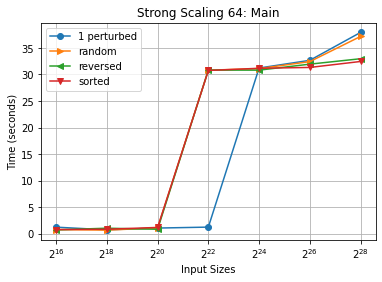

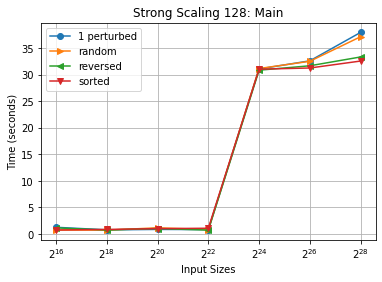

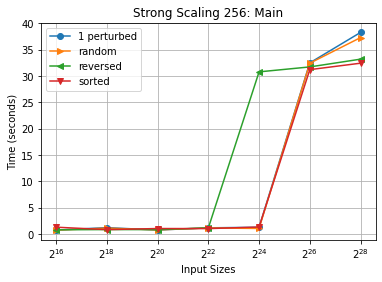

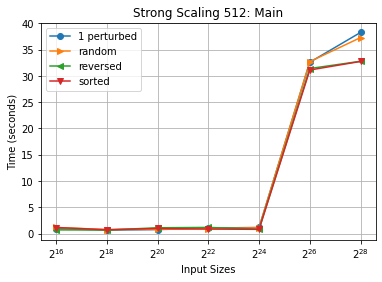

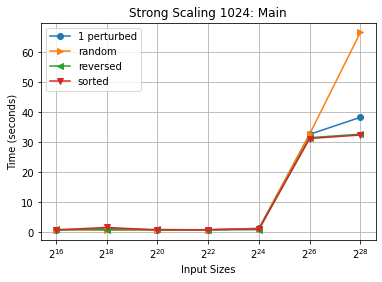

In [21]:
i = 0
for ctk in allctk:
    plot_mpl_inputtypes(
        df=ctk.dataframe[[sorttypes[0]]].loc["main"],
        df1= ctk.dataframe[[sorttypes[1]]].loc["main"],
        df2= ctk.dataframe[[sorttypes[2]]].loc["main"],
        df3= ctk.dataframe[[sorttypes[3]]].loc["main"],
        title=f"Strong Scaling {threads[i]}: Main",
        xlabel="Input Sizes",
        ylabel="Time (seconds)",
        label1='1 perturbed',
        label2='random',
        label3='reversed',
        label4= 'sorted'
    )
    i += 1

# Plot of 2

In [22]:
# i = 0
# for ctk in allctk:
#     plot_mpl2(
#         df= ctk.dataframe[[temp[1]]].loc["main"],
#         df1= ctk.dataframe[[temp[2]]].loc["main"],
#         title=f"Sorted Weak Scaling {sizes[i]}: Main",
#         xlabel="Threads",
#         ylabel="Time (seconds)",
#         label1='Sample',
#         label2='Merge'
#     )
#     i += 1

## Comp_Large Graphs (for 3 then 2)

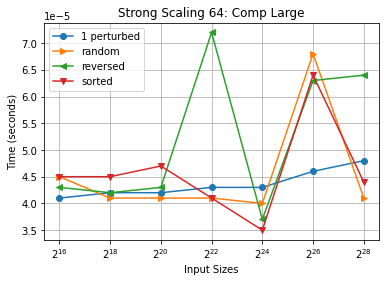

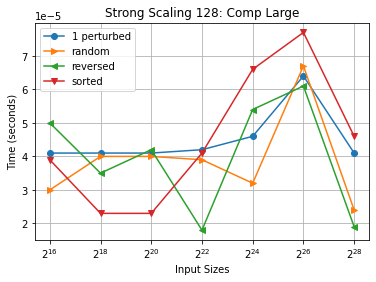

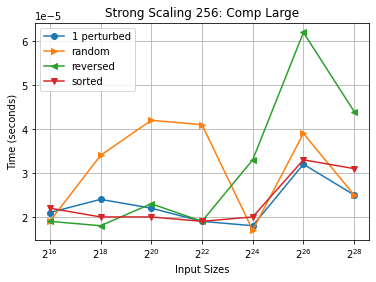

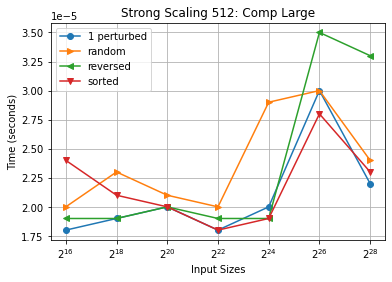

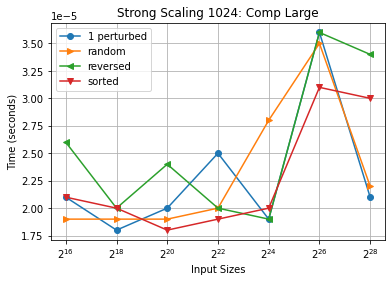

In [23]:
i = 0
for ctk in allctk:
    plot_mpl_inputtypes(
        df=ctk.dataframe[[sorttypes[0]]].loc["comp_large"],
        df1= ctk.dataframe[[sorttypes[1]]].loc["comp_large"],
        df2= ctk.dataframe[[sorttypes[2]]].loc["comp_large"],
        df3= ctk.dataframe[[sorttypes[3]]].loc["comp_large"],
        title=f"Strong Scaling {threads[i]}: Comp Large",
        xlabel="Input Sizes",
        ylabel="Time (seconds)",
        label1='1 perturbed',
        label2='random',
        label3='reversed',
        label4= 'sorted'
    )
    i += 1

In [24]:
# i = 0
# for ctk in allctk:
#     plot_mpl2(
#         df= ctk.dataframe[[temp[1]]].loc["comp_large"],
#         df1= ctk.dataframe[[temp[2]]].loc["comp_large"],
#         title=f"Sorted Weak Scaling {sizes[i]}: Comp Large",
#         xlabel="Threads",
#         ylabel="Time (seconds)",
#         label1='Sample',
#         label2='Merge'
#     )
#     i += 1

## Comm Graphs (for 3 then 2)

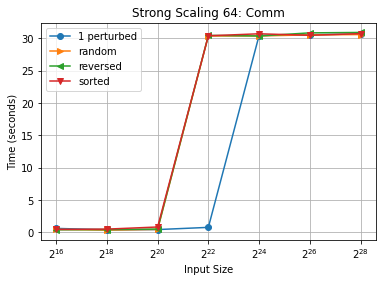

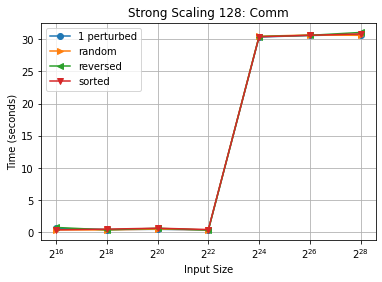

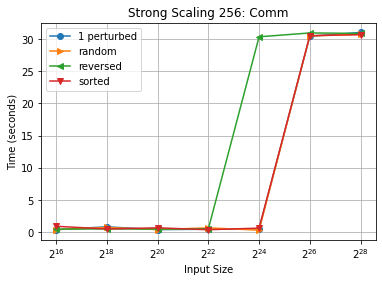

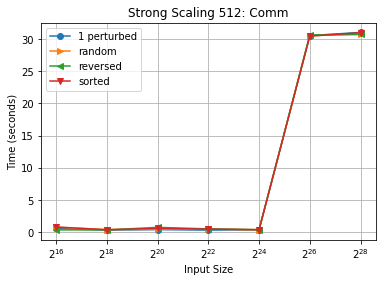

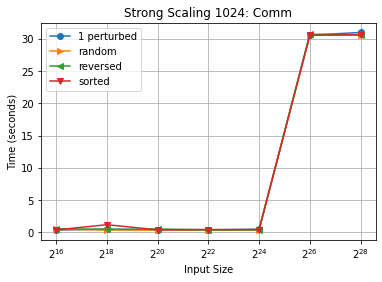

In [25]:
i = 0
for ctk in allctk:
    plot_mpl_inputtypes(
        df=ctk.dataframe[[sorttypes[0]]].loc["comm"],
        df1= ctk.dataframe[[sorttypes[1]]].loc["comm"],
        df2= ctk.dataframe[[sorttypes[2]]].loc["comm"],
        df3= ctk.dataframe[[sorttypes[3]]].loc["comm"],
        title=f"Strong Scaling {threads[i]}: Comm",
        xlabel="Input Size",
        ylabel="Time (seconds)",
        label1='1 perturbed',
        label2='random',
        label3='reversed',
        label4= 'sorted'
    )
    i += 1

In [26]:
# i = 0
# for ctk in allctk:
#     plot_mpl2(
#         df= ctk.dataframe[[temp[1]]].loc["comm"],
#         df1= ctk.dataframe[[temp[2]]].loc["comm"],
#         title=f"Sorted Weak Scaling {sizes[i]}: Comm",
#         xlabel="Threads",
#         ylabel="Time (seconds)",
#         label1='Sample',
#         label2='Merge'
#     )
#     i += 1